## Exploratory data analysis

This exploratory data analysis focuses on the British School Success Survey data from Kaggle. 

In [30]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns                       # visualisation
import matplotlib.pyplot as plt             # visualisation
%matplotlib inline                          
# enables inline plotting,the output of plotting will be displayed directly below the code cell
sns.set(color_codes=True)

In [31]:
# Loading and reading the dataset
df = pd.read_csv('schoolpredict.csv')
# To display the top 5 rows 
df.head()   

,NOR,PNORG,PNORB,School_Phase,GFTE,Total_Teachers,Total_Teaching_Assistants,School_0ort,Full_Time_Teachers,Pupil_Teacher_Ratio,GPS_AVERAGE,MAT_AVERAGE,READ_AVERAGE
0,285,49.5,50.5,Primary,45421.0,24.0,18.0,30.0,19.1,15.0,111.0,110.0,110.0
1,350,53.4,46.6,Primary,47681.0,20.0,9.0,7.0,18.3,19.1,107.0,103.0,106.0
2,410,49.0,51.0,Primary,47719.0,25.0,15.0,3.0,24.4,16.7,109.0,108.0,108.0
3,405,44.2,55.8,Primary,43671.0,24.0,21.0,9.0,21.2,18.5,113.0,110.0,109.0
4,427,49.2,50.8,Primary,43629.0,25.0,16.0,11.0,21.7,19.4,102.0,100.0,99.0


In [32]:
df.columns

Index(['NOR', 'PNORG', 'PNORB', 'School_Phase', 'GFTE', 'Total_Teachers',
       'Total_Teaching_Assistants ', 'School_0ort', 'Full_Time_Teachers',
       'Pupil_Teacher_Ratio', 'GPS_AVERAGE', 'MAT_AVERAGE', 'READ_AVERAGE'],
      dtype='object')

1. Preprocessing the data

In [33]:
# Renaming the columns for better clarity
df = df.rename(columns={"NOR": "No_of_pupils", 
                        "PNORG": "Girls_percentage", 
                        "PNORB": "Boys_percentage", 
                        "School_Phase": "School_type",
                        "GFTE": "Gross_teachers_salary",
                        "Total_Teachers": "Teachers_number", 
                        "Total_Teaching_Assistants": "Teaching_assistants_number", 
                        "Total _ Instructor ": "Total_teaching_staff",
                        "School_0ort": "Support_staff", 
                        "Full_Time_Teachers": "Full_time_teachers_percentage",
                        "Pupil_Teacher_Ratio" : "Pupil_Teacher_Ratio", 
                        "GPS_AVERAGE": "Average_grammar_score",
                        "MAT_AVERAGE": "Average_math_score",
                        "READ_AVERAGE": "Average_reading_score" })
df.head(5)

,No_of_pupils,Girls_percentage,Boys_percentage,School_type,Gross_teachers_salary,Teachers_number,Total_Teaching_Assistants,Support_staff,Full_time_teachers_percentage,Pupil_Teacher_Ratio,Average_grammar_score,Average_math_score,Average_reading_score
0,285,49.5,50.5,Primary,45421.0,24.0,18.0,30.0,19.1,15.0,111.0,110.0,110.0
1,350,53.4,46.6,Primary,47681.0,20.0,9.0,7.0,18.3,19.1,107.0,103.0,106.0
2,410,49.0,51.0,Primary,47719.0,25.0,15.0,3.0,24.4,16.7,109.0,108.0,108.0
3,405,44.2,55.8,Primary,43671.0,24.0,21.0,9.0,21.2,18.5,113.0,110.0,109.0
4,427,49.2,50.8,Primary,43629.0,25.0,16.0,11.0,21.7,19.4,102.0,100.0,99.0


In [34]:
df.columns

Index(['No_of_pupils', 'Girls_percentage', 'Boys_percentage', 'School_type',
       'Gross_teachers_salary', 'Teachers_number',
       'Total_Teaching_Assistants ', 'Support_staff',
       'Full_time_teachers_percentage', 'Pupil_Teacher_Ratio',
       'Average_grammar_score', 'Average_math_score', 'Average_reading_score'],
      dtype='object')

In [35]:
# Shape of the data
df.shape

(16508, 13)

In [36]:
#data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16508 entries, 0 to 16507
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   No_of_pupils                   16508 non-null  int64  
 1   Girls_percentage               16508 non-null  float64
 2   Boys_percentage                16508 non-null  float64
 3   School_type                    16508 non-null  object 
 4   Gross_teachers_salary          16462 non-null  float64
 5   Teachers_number                16464 non-null  float64
 6   Total_Teaching_Assistants      16464 non-null  float64
 7   Support_staff                  16464 non-null  float64
 8   Full_time_teachers_percentage  16464 non-null  float64
 9   Pupil_Teacher_Ratio            16464 non-null  float64
 10  Average_grammar_score          15591 non-null  float64
 11  Average_math_score             15607 non-null  float64
 12  Average_reading_score          15607 non-null 

In [37]:
df.describe()

,No_of_pupils,Girls_percentage,Boys_percentage,Gross_teachers_salary,Teachers_number,Total_Teaching_Assistants,Support_staff,Full_time_teachers_percentage,Pupil_Teacher_Ratio,Average_grammar_score,Average_math_score,Average_reading_score
count,16508.000000,16508.000000,16508.000000,16462.000000,16464.000000,16464.000000,16464.000000,16464.000000,16464.000000,15591.000000,15607.000000,15607.000000
mean,414.013206,49.104380,50.895996,38788.366237,24.401421,16.657191,8.727648,21.916260,19.991648,103.428837,102.198437,101.843468
std,346.244102,8.085835,8.085837,3416.455452,23.404529,10.032515,9.645741,21.864543,3.855463,16.817545,16.551533,16.497889
min,6.000000,0.000000,0.000000,23445.000000,3.000000,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000,0.000000
25%,203.000000,46.900000,48.800000,36679.000000,11.000000,10.000000,3.000000,9.200000,17.400000,104.000000,103.000000,102.000000
50%,306.000000,49.000000,51.000000,38504.000000,16.000000,15.000000,5.000000,14.200000,20.100000,106.000000,105.000000,104.000000
75%,472.000000,51.200000,53.100000,40574.750000,26.000000,22.000000,10.000000,22.900000,22.500000,108.000000,107.000000,106.000000
max,2833.000000,100.000000,100.000000,65987.000000,176.000000,115.000000,107.000000,165.000000,50.000000,118.000000,115.000000,116.000000


In [38]:
# Checking duplicate values
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 13)


In [39]:
# Counting the number of rows
df.count()

No_of_pupils                     16508
Girls_percentage                 16508
Boys_percentage                  16508
School_type                      16508
Gross_teachers_salary            16462
Teachers_number                  16464
Total_Teaching_Assistants        16464
Support_staff                    16464
Full_time_teachers_percentage    16464
Pupil_Teacher_Ratio              16464
Average_grammar_score            15591
Average_math_score               15607
Average_reading_score            15607
dtype: int64

In [40]:
# Checking missing values 
print(df.isnull().sum())

No_of_pupils                       0
Girls_percentage                   0
Boys_percentage                    0
School_type                        0
Gross_teachers_salary             46
Teachers_number                   44
Total_Teaching_Assistants         44
Support_staff                     44
Full_time_teachers_percentage     44
Pupil_Teacher_Ratio               44
Average_grammar_score            917
Average_math_score               901
Average_reading_score            901
dtype: int64


In [41]:
# Calculating percentage of missing values for each column
total_rows = len(df)        #total number of rows
missing_percentage = (df.isnull().sum() / total_rows) * 100
print("Percentage of missing values for each column:")
print(missing_percentage)

Percentage of missing values for each column:
No_of_pupils                     0.000000
Girls_percentage                 0.000000
Boys_percentage                  0.000000
School_type                      0.000000
Gross_teachers_salary            0.278653
Teachers_number                  0.266537
Total_Teaching_Assistants        0.266537
Support_staff                    0.266537
Full_time_teachers_percentage    0.266537
Pupil_Teacher_Ratio              0.266537
Average_grammar_score            5.554882
Average_math_score               5.457960
Average_reading_score            5.457960
dtype: float64


The dataset displays a relatively low percentage of missing values, particularly concerning the average test scores. Given this modest proportion of missing data and the inability to feasibly impute values for these scores due to the nature of the data, I have chosen to address this by excluding the corresponding entries. This approach ensures that analyses are performed on a dataset with a higher degree of completeness, thereby bolstering the reliability and accuracy of our findings.

In [42]:
# Dropping the missing values
df = df.dropna()    
df.count()

No_of_pupils                     15538
Girls_percentage                 15538
Boys_percentage                  15538
School_type                      15538
Gross_teachers_salary            15538
Teachers_number                  15538
Total_Teaching_Assistants        15538
Support_staff                    15538
Full_time_teachers_percentage    15538
Pupil_Teacher_Ratio              15538
Average_grammar_score            15538
Average_math_score               15538
Average_reading_score            15538
dtype: int64

In [43]:
# Checking the data again for missing values 
print(df.isnull().sum())   # After dropping the values

No_of_pupils                     0
Girls_percentage                 0
Boys_percentage                  0
School_type                      0
Gross_teachers_salary            0
Teachers_number                  0
Total_Teaching_Assistants        0
Support_staff                    0
Full_time_teachers_percentage    0
Pupil_Teacher_Ratio              0
Average_grammar_score            0
Average_math_score               0
Average_reading_score            0
dtype: int64


In [44]:
# Checking for value '0'
zero_count_per_column = (df == 0).sum()
print(zero_count_per_column)

No_of_pupils                       0
Girls_percentage                  64
Boys_percentage                  100
School_type                        0
Gross_teachers_salary              0
Teachers_number                    0
Total_Teaching_Assistants         46
Support_staff                     81
Full_time_teachers_percentage      0
Pupil_Teacher_Ratio               14
Average_grammar_score            385
Average_math_score               385
Average_reading_score            385
dtype: int64


NOTE: Columns Pupil_Teacher_Ratio, Average_grammar_score, Average_math_score, and Average_reading_score, should not contain zero values. These metrics are fundamental indicators of educational performance and structure and are unlikely to legitimately assume a zero value. To ensure the integrity and accuracy of subsequent analyses these rows will be removed.

In [45]:
# Removing rows where there are 0 values in the selected columns
selected_columns = ['Pupil_Teacher_Ratio', 'Average_grammar_score', 'Average_math_score', 'Average_reading_score' ]
df = df[(df[selected_columns] != 0).all(axis=1)]
# Print the dimensions of the filtered DataFrame
df.shape

(15139, 13)

2. Data Visualization

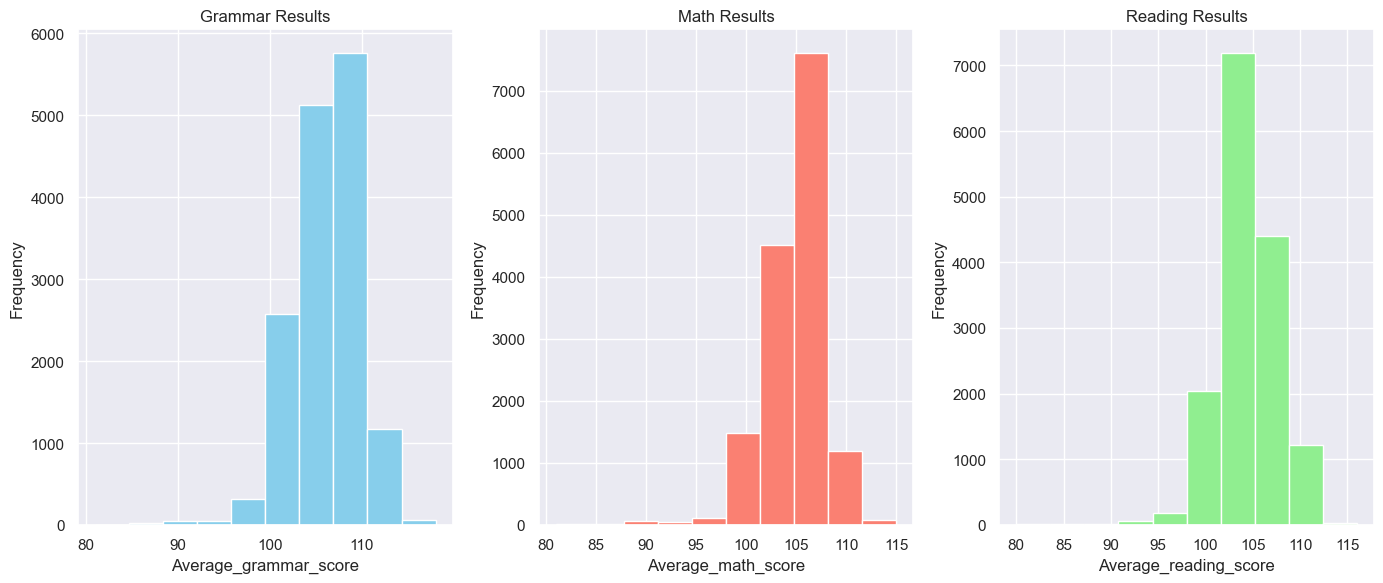

In [46]:
# The distribution of pupils' performance in grammar, math, and reading
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
df['Average_grammar_score'].plot(kind='hist', color='skyblue')
plt.title("Grammar Results")
plt.xlabel("Average_grammar_score")
plt.tight_layout()

plt.subplot(1,3,2)
df['Average_math_score'].plot(kind='hist', color='salmon')
plt.title("Math Results")
plt.xlabel("Average_math_score")
plt.tight_layout()

plt.subplot(1,3,3)
df['Average_reading_score'].plot(kind='hist', color='lightgreen')
plt.title("Reading Results")
plt.xlabel("Average_reading_score")
plt.tight_layout()

The scores on all three tests are fairly evenly distributed, with no one score range standing out significantly from the others.
There is a slightly higher frequency of students scoring in the 100-110 range on all three tests, compared to other score ranges.
There are a few students who scored very high on each test (over 110), but there are also a few students who scored below 95.

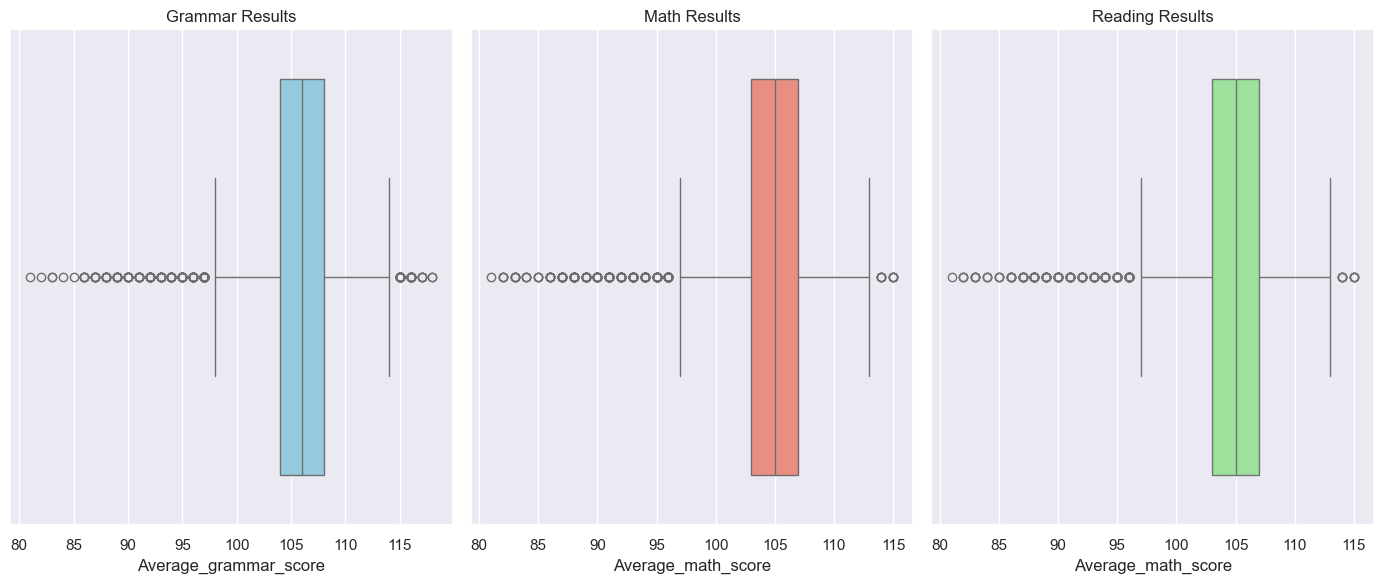

In [47]:
# Statistical analysis (the spread of values) of pupils' performance in grammar, math, and reading 
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
sns.boxplot(data=df, x='Average_grammar_score', color='skyblue')
plt.title("Grammar Results")
plt.tight_layout()

plt.subplot(1,3,2)
sns.boxplot(data=df, x='Average_math_score', color='salmon')
plt.title("Math Results")
plt.tight_layout()

plt.subplot(1,3,3)
sns.boxplot(data=df, x='Average_math_score', color='lightgreen')
plt.title("Reading Results")
plt.tight_layout()


Grammar scores exhibit the most variability with more outliers on each side of the box , while math and reading scores are more clustered. The median of the grammar scores also appears to be slightly higher than for other scores.

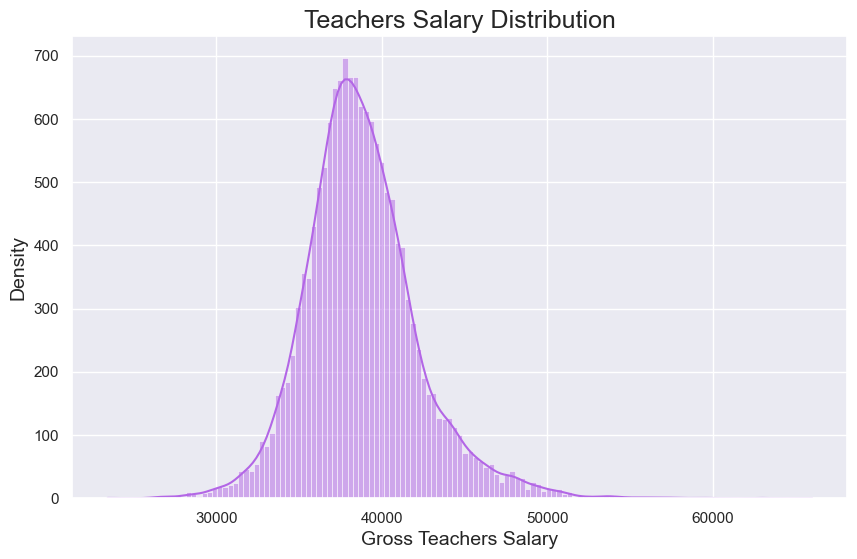

In [48]:
# The distribution of the Gross_teachers_salary variable
plt.figure(figsize=(10,6))
sns.histplot(df['Gross_teachers_salary'], color=(0.7, 0.4, 0.9), kde=True)
plt.title("Teachers Salary Distribution", size=18)
plt.xlabel("Gross Teachers Salary", size=14)
plt.ylabel("Density", size=14)
plt.show()

The distribution of the Gross_teachers_salary variable appears to be:

Bell-shaped, with most salaries concentrated around the middle and fewer salaries towards the extremes. This suggests that there is a central tendency in the data, with a majority of teachers' salaries falling within 30000 - 50000 range.

Symmetrical: The left and right sides of the distribution seem roughly balanced, indicating that there is no significant skew towards higher or lower salaries.

Unimodal: There appears to be a single peak in the distribution, suggesting that there is one dominant group of salaries.

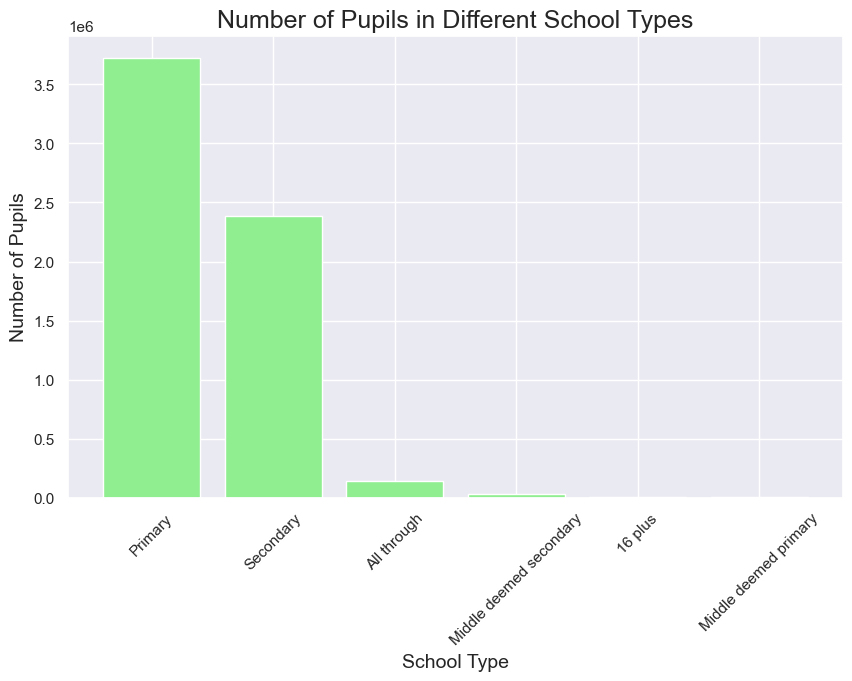

In [49]:
# Compare the number of pupils in different school phases
phase_pupil_counts = df.groupby('School_type')['No_of_pupils'].sum().reset_index() # Grouping the data by School_Phase and calculating the total number of pupils in each phase
phase_pupil_counts = phase_pupil_counts.sort_values(by='No_of_pupils', ascending=False) # Sorting the phases based on the total number of pupils
plt.figure(figsize=(10, 6))
plt.bar(phase_pupil_counts['School_type'], phase_pupil_counts['No_of_pupils'], color='lightgreen')
plt.title('Number of Pupils in Different School Types', size=18)
plt.xlabel('School Type', size=14)
plt.ylabel('Number of Pupils', size=14)
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

Overall pupil distribution shows that primary schools have the highest number of pupils. There are almost twice as many pupils in primary schools compared to secondary schools.
the age demographics is the main reason for this distribution as there are naturally more children in the primary school age range than in the secondary school age range.
Moreover, the UK education system typically has more primary schools than secondary schools.

<Figure size 1000x600 with 0 Axes>

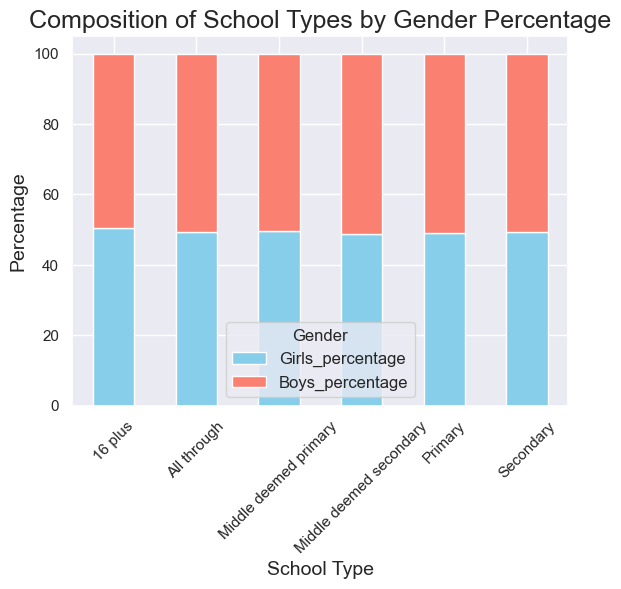

In [50]:
# Comparing percentage of boys and girls in school types
phase_gender_percentages = df.groupby('School_type')[['Girls_percentage', 'Boys_percentage']].mean()    # Grouping the data by 'School_type' and calculating the mean percentages

plt.figure(figsize=(10, 6))
phase_gender_percentages.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Composition of School Types by Gender Percentage', size=18)
plt.xlabel('School Type', size=14)
plt.ylabel('Percentage', size=14)
plt.xticks(rotation=45)
plt.legend(title='Gender', fontsize='medium')
plt.show()

It appears that the percentages of boys and girls are relatively balanced across most school types. This suggests that there are no major gender disparities in school enrollment in this dataset.
There might be some small differences in the proportions of boys and girls in certain school types, the data set includes gender specific schools.

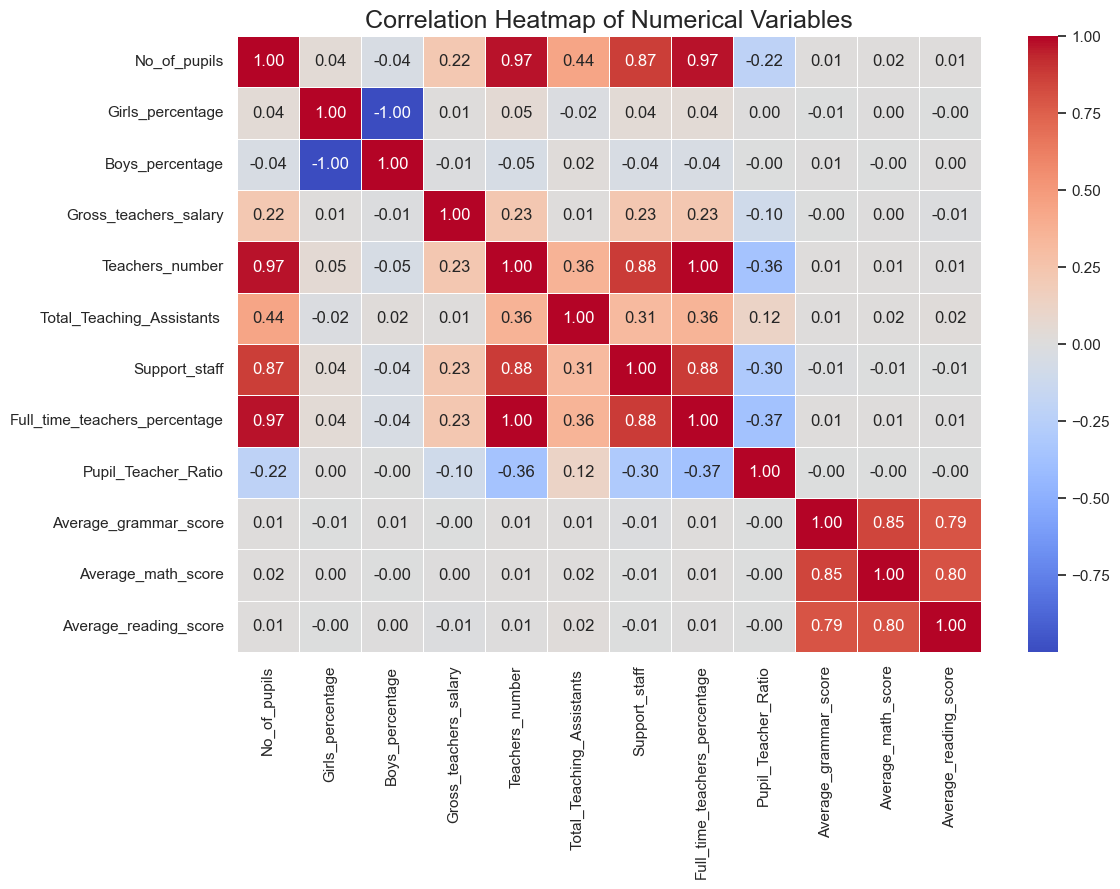

In [51]:
# Creating a correlation heatmap that visualizes the relationships between the numerical variables
numerical_columns = ['No_of_pupils', 'Girls_percentage', 'Boys_percentage',
                    'Gross_teachers_salary', 'Teachers_number',
                    'Total_Teaching_Assistants ', 'Support_staff',
                    'Full_time_teachers_percentage', 'Pupil_Teacher_Ratio',
                    'Average_grammar_score', 'Average_math_score', 'Average_reading_score']

correlation_matrix = df[numerical_columns].corr()   # Calculating the correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables', size=18)
plt.show()

Each cell in the heatmap represents the correlation coefficient between two variables, with values closer to 1 indicating stronger positive correlation, values closer to -1 indicating stronger negative correlation, and values close to 0 indicating weak or no correlation.

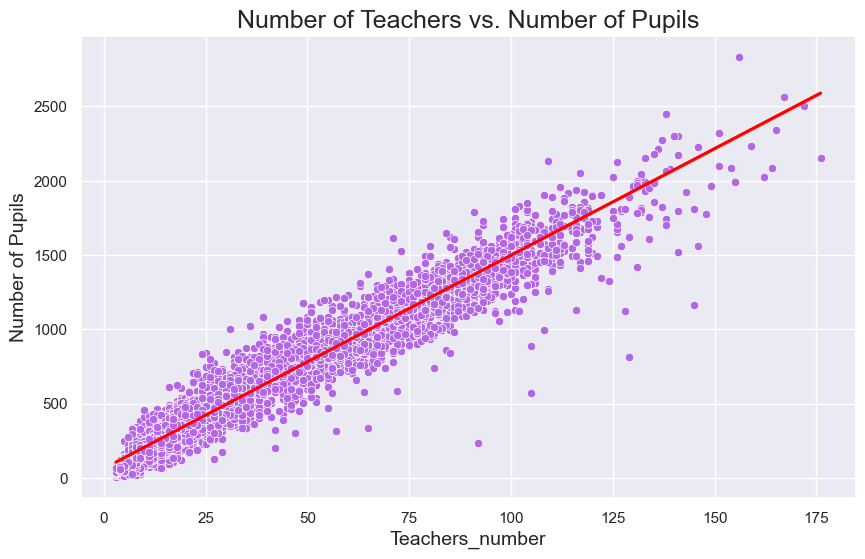

In [52]:
# correlation between the number of teachers and the number of pupils.

# Creating scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Teachers_number', y='No_of_pupils', color=(0.7, 0.4, 0.9))

# Adding regression line
sns.regplot(data=df, x='Teachers_number', y='No_of_pupils', scatter=False, color='red')

plt.title('Number of Teachers vs. Number of Pupils', size=18)
plt.xlabel('Teachers_number', size=14)
plt.ylabel('Number of Pupils', size=14)
plt.show()


There appears to be a strong positive correlation between the number of teachers and the number of pupils. This is to be expected, as more pupils would typically require more teachers. 
The chart shows few outliers, specifically where the ration of pupils to teachers is lower. 

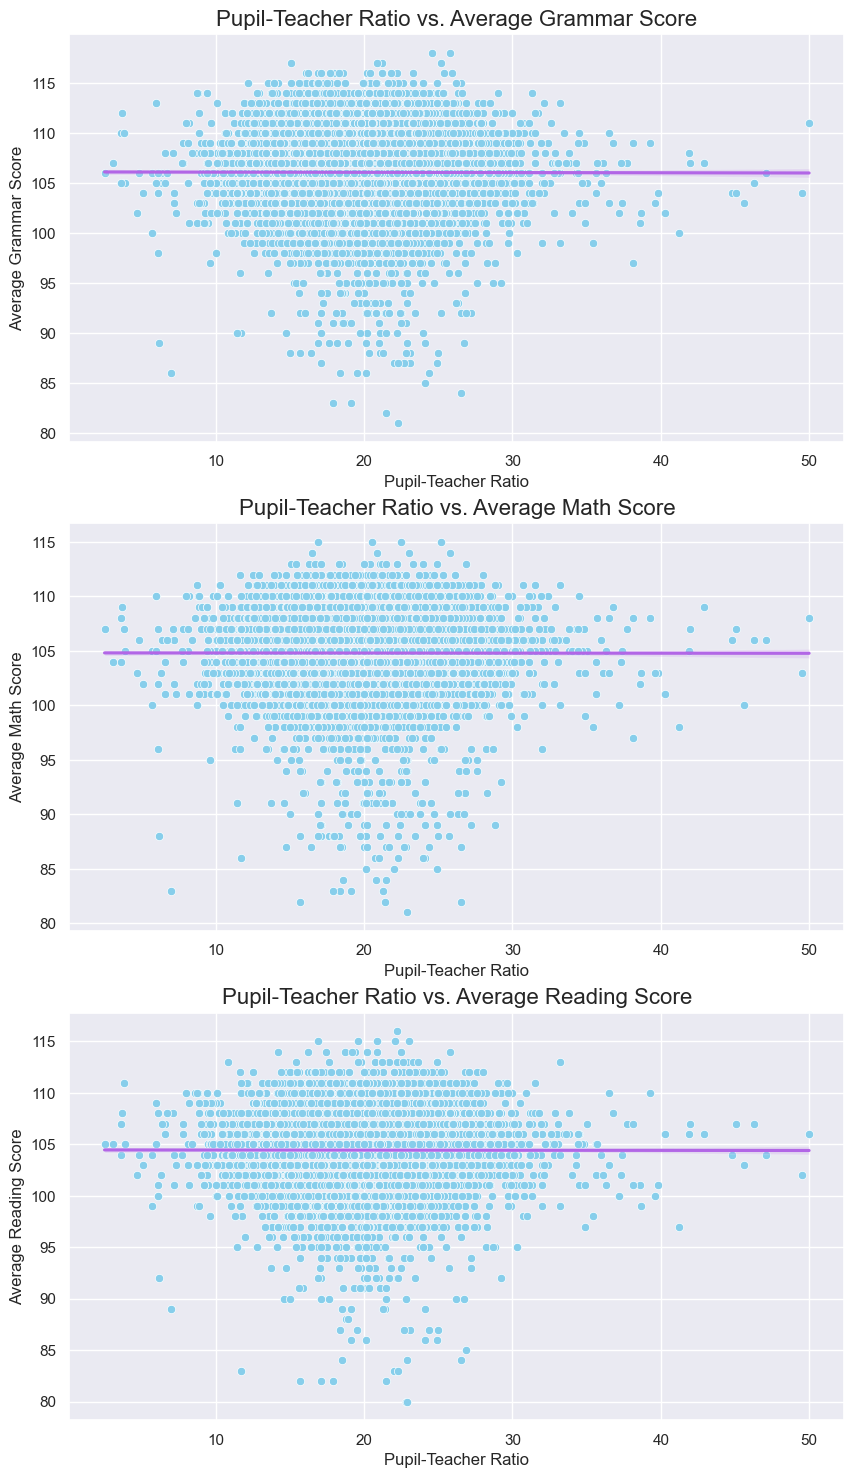

Correlation between Pupil-Teacher Ratio and Average Grammar Score: -0.00
Correlation between Pupil-Teacher Ratio and Average Math Score: -0.00
Correlation between Pupil-Teacher Ratio and Average Reading Score: -0.00


In [53]:
# Exploring the relationship between the pupil-teacher ratio and pupil performance.

# Create scatter plots with regression lines
plt.figure(figsize=(10, 18))

plt.subplot(3, 1, 1)
sns.scatterplot(data=df, x='Pupil_Teacher_Ratio', y='Average_grammar_score', color='skyblue')
sns.regplot(data=df, x='Pupil_Teacher_Ratio', y='Average_grammar_score', scatter=False, color=(0.7, 0.4, 0.9))

plt.title('Pupil-Teacher Ratio vs. Average Grammar Score', size=16)
plt.xlabel('Pupil-Teacher Ratio', size=12)
plt.ylabel('Average Grammar Score', size=12)

plt.subplot(3, 1, 2)
sns.scatterplot(data=df, x='Pupil_Teacher_Ratio', y='Average_math_score', color='skyblue')
sns.regplot(data=df, x='Pupil_Teacher_Ratio', y='Average_math_score', scatter=False, color=(0.7, 0.4, 0.9))

plt.title('Pupil-Teacher Ratio vs. Average Math Score', size=16)
plt.xlabel('Pupil-Teacher Ratio', size=12)
plt.ylabel('Average Math Score', size=12)

plt.subplot(3, 1, 3)
sns.scatterplot(data=df, x='Pupil_Teacher_Ratio', y='Average_reading_score', color='skyblue')
sns.regplot(data=df, x='Pupil_Teacher_Ratio', y='Average_reading_score', scatter=False, color=(0.7, 0.4, 0.9))

plt.title('Pupil-Teacher Ratio vs. Average Reading Score', size=16)
plt.xlabel('Pupil-Teacher Ratio', size=12)
plt.ylabel('Average Reading Score', size=12)

plt.show()

# Calculate correlation coefficients
correlation_grammar = df['Pupil_Teacher_Ratio'].corr(df['Average_grammar_score'])
correlation_math = df['Pupil_Teacher_Ratio'].corr(df['Average_math_score'])
correlation_reading = df['Pupil_Teacher_Ratio'].corr(df['Average_reading_score'])

print(f"Correlation between Pupil-Teacher Ratio and Average Grammar Score: {correlation_grammar:.2f}")
print(f"Correlation between Pupil-Teacher Ratio and Average Math Score: {correlation_math:.2f}")
print(f"Correlation between Pupil-Teacher Ratio and Average Reading Score: {correlation_reading:.2f}")


The correlations between the pupil-teacher ratio and the average grammar, math, and reading scores are all very close to zero (-0.00). 
This indicates an extremely weak or negligible linear relationship between these variables.

<Figure size 2000x600 with 0 Axes>

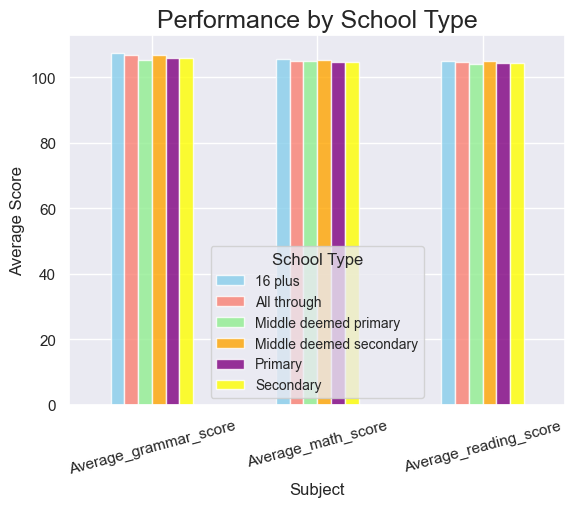

In [54]:
# Performance in grammar, math and reading by school type.

phase_scores = df.groupby('School_type')[['Average_grammar_score', 'Average_math_score', 'Average_reading_score']].mean()   # Grouping the data by school type and calculating the mean scores
phase_scores = phase_scores.T   # Transposing the DataFrame for easier plotting

# List of colors
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'yellow']

plt.figure(figsize=(20, 6))
phase_scores.plot(kind='bar', color=colors, alpha=0.8)
plt.title('Performance by School Type', size=18)
plt.xlabel('Subject', size=12)
plt.ylabel('Average Score', size=12)
plt.xticks(rotation=15)  # Rotating labels by 45 degrees
plt.legend(title='School Type', fontsize='small')
plt.show()

All school types have similar average scores in grammar, math and reading, with slightly higher results in grammar. It appears that '16 plus' schools average performance is higher across all three subjects. No visual outliers or discrepancies.

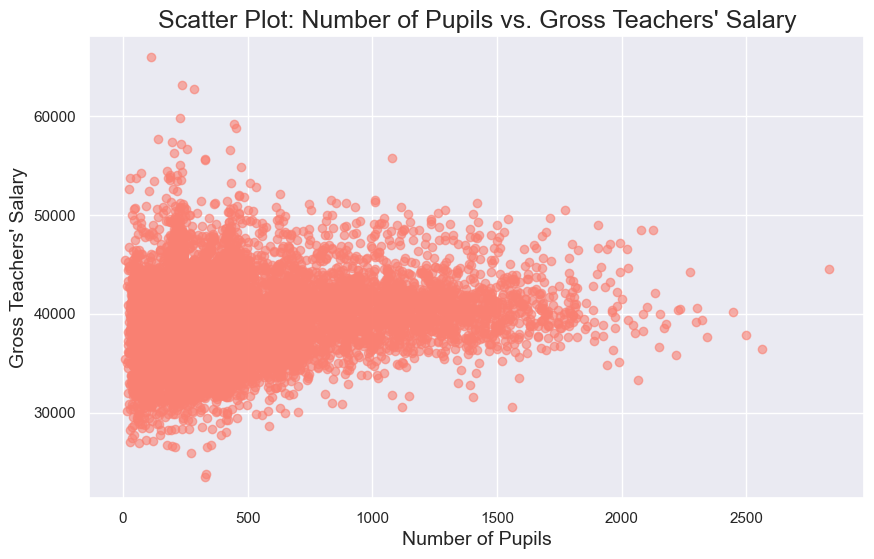

In [55]:
# Examining relationship between the number of pupils and the gross teachers' salary
plt.figure(figsize=(10, 6))
plt.scatter(df['No_of_pupils'], df['Gross_teachers_salary'], color='salmon', alpha=0.6)
plt.title('Scatter Plot: Number of Pupils vs. Gross Teachers\' Salary', size=18)
plt.xlabel('Number of Pupils', size=14)
plt.ylabel('Gross Teachers\' Salary', size=14)
plt.grid(True)
plt.show()

The scatter plot suggests a weak positive relationship between the number of pupils and the gross teachers' salary. This means that as the number of pupils increases, there is a slight tendency for the gross teachers' salary to also increase. However, the data points are quite scattered, indicating that the relationship is not very strong.

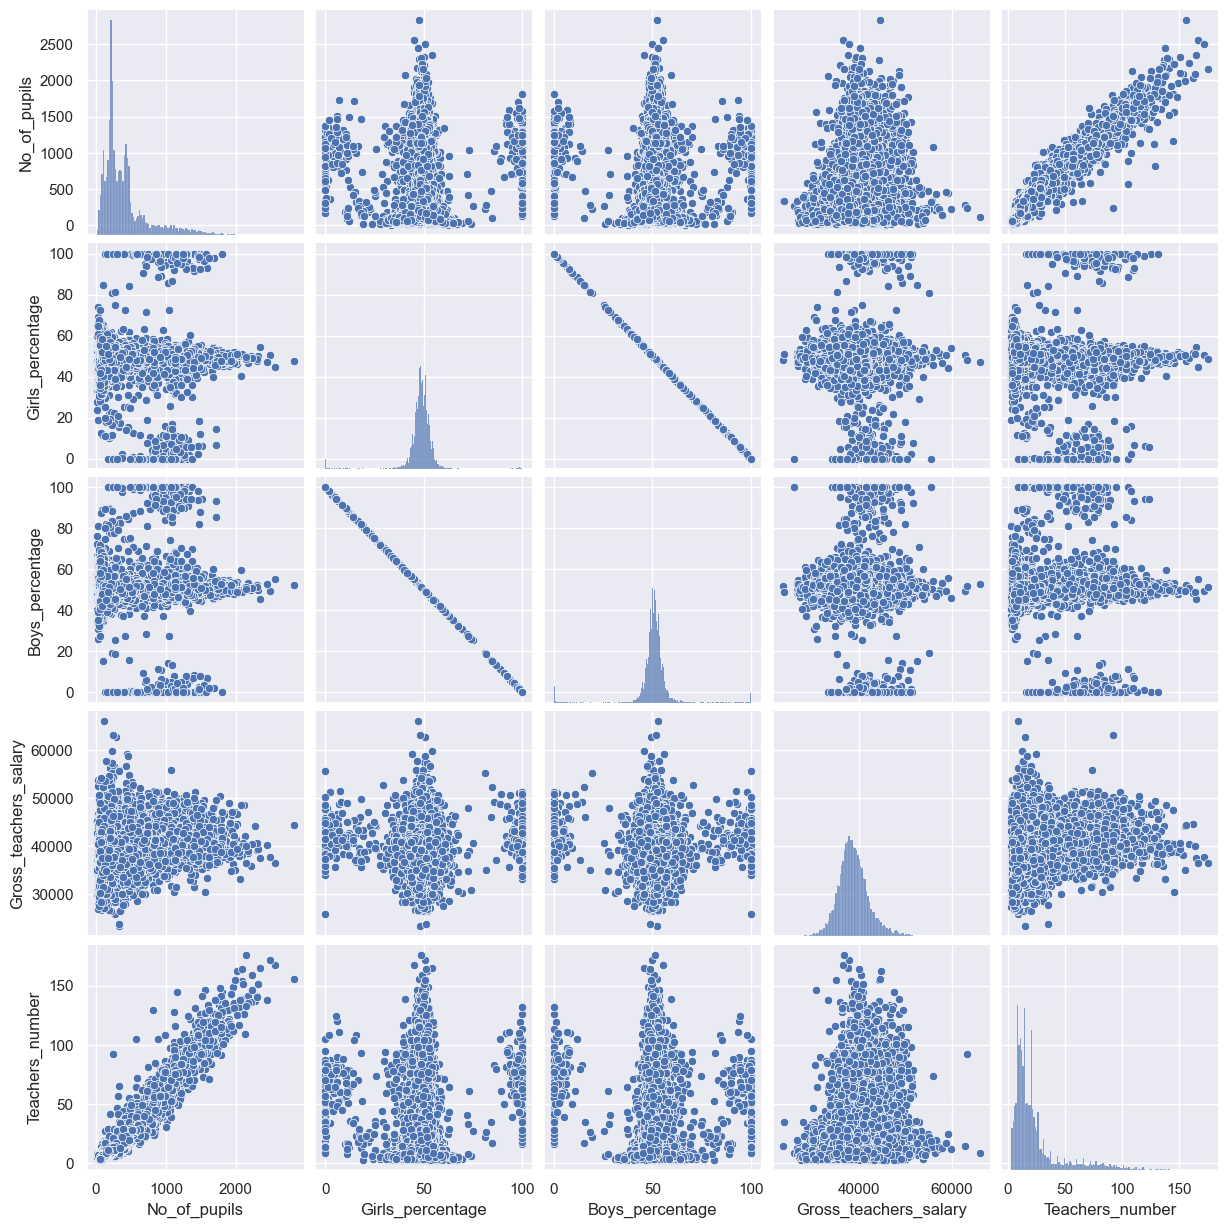

In [57]:
# Scatter plot matrix for visualizing relationships between multiple variables
variables = ['No_of_pupils', 'Girls_percentage', 'Boys_percentage', 'Gross_teachers_salary', 'Teachers_number']
sns.pairplot(df[variables])
plt.show()

The scatter plot matrix shows following correlations between the variables:

Number of pupils vs. Gross teachers: There appears to be weak positive correlation between the number of pupils and the gross teachers' salary. 

Number of pupils vs. Teachers number: There is strong positive correlation between number of pupils and teachers number.

Gross_teachers_salary vs. Teachers number: There appears to be weak positive correlation between the gross teachers' salary and the number of teachers. 

This is to be expected, as more pupils would typically require more teachers and a higher salary budget.